# ПРАКТИКУМ часть 2
Анашкина А.А., 415 группа

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Задание 7

*7.1 Методом случайного поиска найти минимальное значение функции f на множестве $A = \{ x_1, x_2: x_1^2 + x_2^2 \leq 1\}$, где*
$$f(x_1, x_2) = x_1^3 \sin \frac{1}{x_1} + 10x_1x_2^4 \cos \frac{1}{x_2}, \quad x_1, x_1  \neq 0$$
*При $x_1 = 0$ или $x_2 = 0$ функции доопределяютсяпо непрерывности*

В ходе метода случайного поиска произвольно выбираются точки из рассматриваемой области, и в каждой точке рассчитывается значение целевой функции. В качестве решения принимается точка, в которой значение функции минимально.


Сначала необходимо понять, как выбрать случайню точку в единичной окружности. Далее предложен способ, с помощью которого подходящая точка гарантированно выбирается с первого раза. Перейдём к полярным координатам:
$$\begin{dcases}
x_1 = r \cdot \cos \phi, \\
x_2 = r \cdot \sin \phi
\end{dcases}$$
Если положить $r \sim U[0,1], \phi \sim U[0, 2\pi]$, не получим равномерное распределение (в центре окружности будет содержаться большее число точек). Это обусловлено тем, что каждое кольцо круга будет седержать примерно одинаковое число точек, то есть проблема в распределении $r$. Так как длина окружности линейно зависит от радиуса, для сохранения одинаковой плостности точек их количество должно тоже зависеть от радиуса. Тогда пусть функция плотности вероятности $f(r) = mr$. Найдем значение m:
$$\int_0^1 mr dr = 1 \quad \Rightarrow f(r) = 2r$$
Тогда функция распределения 
$$F_X(r) = \int_0^r f(x) dx = \int_0^r 2x dx = r^2 = \mathbb{R}(X \leq r) = \mathbb{P}(U \leq F_X(r)) = \mathbb{P}(F_X^{-1}(U) \leq r)$$
$$X = F_X^{-1}(U), \quad F_X^{-1}(r) = \sqrt r$$

In [2]:
def sqrt_dist(*shape):
    phi = np.random.uniform(0, 2*math.pi, *shape)
    r = np.sqrt(np.random.uniform(0.0, 1.0, *shape))
    return r * np.cos(phi), r * np.sin(phi)

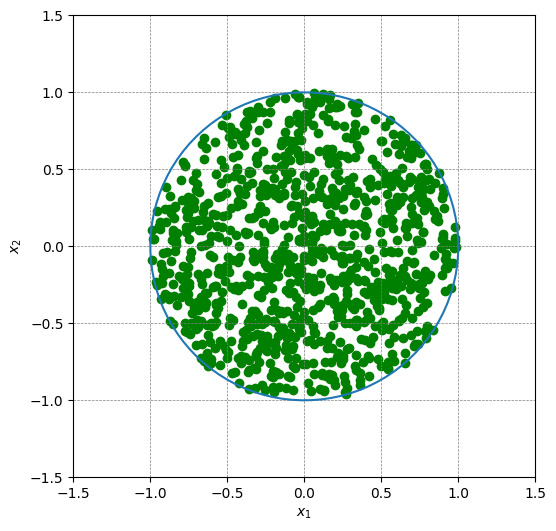

In [3]:
theta = np.linspace(0, 2 * np.pi, 100)
x = np.cos(theta)
y = np.sin(theta)
x1, x2 = sqrt_dist(1000)
plt.figure(figsize=(6,6))
plt.plot(x, y)
plt.scatter(x1, x2, color='green', marker='o')
#plt.title("Uniform distribution of a random variable in a circle")
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('circ.eps', format='eps')
plt.show()

Далее оценим точность метода случайного поиска. Сделаем аналитические выводы, которые упрощают задачу минимизации: $\\$
По условию $f$ - непрерывная функция и $f(0, 0) = 0$. Минимум не может достигаться в точке $(0, 0)$. Функция является чётной по $x_2$. Из этого следует, что функция имеет не меньше двух точек минимума. Для оценки точности необходимо использовать формулу конечных приращений Лагранжа, для этого рассмотрим частные производные:
$$\frac{\partial f}{\partial x_1} = 3x_1^2 \sin \frac{1}{x_1} - x_1 \cos \frac{1}{x_1} + 10x_2^4 \cos \frac{1}{x_1}$$
$$\frac{\partial f}{\partial x_1} = 40 x_1 x_2^3\cos \frac{1}{x_2} - 10x_1x_2^2\sin \frac{1}{x_2}$$
Обозначим $x^\ast = (x_1^\ast, x_2^\ast)$ как точку минимума, полученную теоретически. 
Пусть 
$$||x^\ast - x|| = \delta.$$
Тoгда справедлива следующая оценка:
$$|f(x_1^\ast, x_2^\ast) - f(x_1, x_2)| \leq \sup_{A} \sqrt{\bigg(\frac{\partial f}{\partial x_1}\bigg)^2 + \bigg(\frac{\partial f}{\partial x_2}\bigg)^2}||x^\ast - x|| \leq \sqrt{14^2 + 50^2}\delta$$
Введём дополнительные параметры, необходимые для решения задачи: p - вероятность попадания хотя бы одной точки в $\delta$-окрестность $x^\ast$, $n$ - число точек.
$$p = 1 - \mathbb{P}(\forall i: \ ||x^\ast - x_i|| > \delta) = 1 - (\mathbb{P}(||x^\ast - x_i|| > \delta))^n = 1 - (1 - \mathbb{P}(||x^\ast - x_i|| \leq \delta))^n$$
Через отношение площадей можем посчитать следующую величину:
$$\mathbb{P}(||x^\ast - x_i|| \leq \delta) \geq \frac{\pi \delta^2}{\pi \cdot 1^2} = \delta^2$$
$$p \geq 1 - (1 - \delta^2)^n$$
Итак, 
$$\epsilon \leq \sqrt{14^2 + 50^2}\delta ,\quad \Rightarrow \quad \epsilon \leq \sqrt{(14^2 + 50^2)(1 - \sqrt[n]{1 - p})} $$



In [4]:
def func_minimized(x1, x2):
    return x1 ** 3 * np.sin(1 / x1) + 10 * x1 * x2 ** 4 * np.cos(1 / x2)

In [5]:
def random_search_meth(el_num, p):
    x1, x2 = sqrt_dist(el_num)
    min_val = np.min(func_minimized(x1, x2))
    min_ind = np.argmin(func_minimized(x1, x2))
    tol = np.sqrt((14 ** 2 + 50 ** 2) * (1 - (1 - p) ** (1 / el_num)))
    print(f"Mininmum value: {min_val}")
    print(f"Minimum point: {[x1[min_ind], x2[min_ind]]}")
    print(f"Error rate: {tol}") 

In [9]:
random_search_meth(1000, 0.95)

Mininmum value: -1.243559922115075
Minimum point: [-0.3563985990743329, 0.9288681866122033]
Error rate: 2.839790269294022


In [10]:
random_search_meth(10000, 0.95)

Mininmum value: -1.2643004261000226
Minimum point: [-0.36214057969296276, 0.9292525623712895]
Error rate: 0.898625872072376


In [8]:
random_search_meth(100000, 0.95)

Mininmum value: -1.287125608193246
Minimum point: [-0.35239522781409244, -0.9357258555071142]
Error rate: 0.2841896063481729


In [11]:
random_search_meth(1000000, 0.95)

Mininmum value: -1.288184064054139
Minimum point: [-0.3596014016260054, 0.9330775055202664]
Error rate: 0.08986925009208521


*7.2 Методом имитации отжига найти минимальное значение функции Розенброка $g$ в пространстве $\mathbb{R}^2$, где*
$$g(x) = (x_1 - 1)^2 + 100(x_2 - x_1^2)^2$$

За основу метода взят процесс кристаллизации вещества. Цель отжига - привети систему в состояние с наименьшей энергией, поэтому, используя данный метод, можем "хорошо" находить точки глобального минимума. Пусть $S$ - множество всех состояний системы, $s_i$ - состояние системы на $i$-м шаге, $t_i$ - температура на $i$-м шаге. Для реализации метода необходимо определить следующие функции: $\\$
- функцию, порождающую новое состояние - нормальная слуйчайная величины со средним $(x_i, y_i)$ и дисперсией $\sigma^2 \cdot T_i\\$
- функцию вероятности перехода $P = e^{-\Delta F_i / T_i} \\$
- функцию изменения температуры. Она обязательно должна уменьшать значение на каждой итерации $T_{i+1} = kT_i, \quad 0 < k < 1 \\$
Решение задачи определяется значениями параметров $\sigma, k, T_0$. Также знаем, что теоретический минимум функции Розенборка находяится в точке $(1, 1)$, исходя из этого, оценим оптимальные значения параметров.
- Изменение температуры: $\\$
По сути параметр $k$ задаёт число итераций, так как условием выхода является $t_n \leq \epsilon$.
$$t_n = k^n \epsilon$$
Решив это неравенство, получим оценку для n:
$$n = \lfloor \frac{\ln \epsilon - \ln T_0}{\ln k}\rfloor + 1$$
Будем выбирать $k$ близким к 1, чтобы получить большее число итераций.
- Переход в новое состояние: $\\$
Параметр $\sigma$ можем выбирать достаточно большим, так как за счёт домножения на $T_k$, со временем занчение дисперсии окажется в правильном промежутке по правилу трёх сигм (так как нам известен теоретический минимум).
- Значение t_0 достаточно выбирать большим $\epsilon \\$.
В качестве начального приближения выберем точку $(0, 0)$. 

In [23]:
def Rosenbrock_func(x1, x2):
    return (x1 - 1) ** 2 + 100 * (x2 - x1 ** 2) ** 2

In [24]:
def temp_change(prev_t, k):
    return k * prev_t

In [31]:
def transform_prob(dF, t_prev):
    return math.exp(- dF / t_prev)

In [26]:
def IsTransform(prob):
    if np.random.rand() <= prob:
        return True
    return False

In [27]:
def gen_neighbour(x1_prev, x2_prev, t_prev, sigma):
    x1 = np.random.randn() * sigma * math.sqrt(t_prev) + x1_prev
    x2 = np.random.randn() * sigma * math.sqrt(t_prev) + x2_prev
    return x1, x2

In [29]:
def simulated_annealing(eps, x1_0, x2_0, sigma, k, t_0):
    x1_prev = x1_0
    x2_prev = x2_0
    t_prev = t_0
    prev_energy = Rosenbrock_func(x1_prev, x2_prev)
    while t_prev > eps:
        x1_new, x2_new = gen_neighbour(x1_prev, x2_prev, t_prev, sigma)
        new_energy = Rosenbrock_func(x1_new, x2_new)
        dF = new_energy - prev_energy
        if dF <= 0:
            x1_prev = x1_new
            x2_prev = x2_new
            prev_energy = new_energy
        else:
            P = transform_prob(dF, t_prev)
            if IsTransform(P):
                x1_prev = x1_new
                x2_prev = x2_new
                prev_energy = new_energy
        t_prev = temp_change(t_prev, k)
    return prev_energy, x1_prev, x2_prev

In [37]:
print(simulated_annealing(10**(-5), 0, 0, 2, 0.9, 2))

(0.004055813890275017, 1.0632896145636836, 1.1312935962183932)


Оценим точность графически. Проведём $m$ тестов и сравним результат в теоретическим.

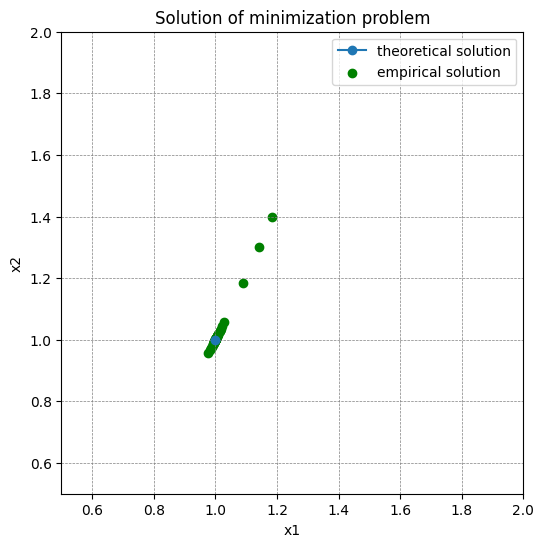

In [44]:
m = 50
x1 = np.zeros(m)
x2 = np.zeros(m)
for i in range(m):
    _, x1[i], x2[i] = simulated_annealing(10**(-5), 0, 0, 2, 0.99, 2)
plt.figure(figsize=(6,6))
plt.plot(1, 1, marker='o', label='theoretical solution')
plt.scatter(x1, x2, color='green', marker='o', label='empirical solution')
plt.title("Solution of minimization problem")
plt.xlim(0.5, 2)
plt.xlabel("x1")
plt.ylim(0.5, 2)
plt.ylabel("x2")
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()

*7.3 Оценить точность и сравнить результаты со стандартными методами оптимизации*

In [63]:
from scipy.optimize import minimize, rosen

Вычислим минимум функции $f(x)$ симплекс-методом Нелдера-Мида. Это алгоритм, в котором вычисляются только значения функции. Симплекс метод является одним из самых простых способов свести достаточно гладкую функцию к минимуму, однако вычисления могут быть слишком долгими.
$$f(x_1, x_2) = x_1^3 \sin \frac{1}{x_1} + 10x_1x_2^4 \cos \frac{1}{x_2}, \quad x_1, x_1  \neq 0$$

In [56]:
def f_func_P(x):
    return np.abs(x[0] ** 3 * np.sin(1 / x[0]) + 10 * x[0] * x[1] ** 4 * np.cos(1 / x[1]))

In [58]:
x0 = np.array([- 1, 1])
res = minimize(f_func_P, x0, method='nelder-mead', options={'xatol': 1e-8, 'disp': True})
print(res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 94
         Function evaluations: 185
[-1.04110458  0.76459629]


Выше было взято плохое начальное приближение - точка слишком удалена от решения

In [59]:
x0 = np.array([- 0.5, 0.5])
res = minimize(f_func_P, x0, method='nelder-mead', options={'xatol': 1e-8, 'disp': True})
print(res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 90
         Function evaluations: 178
[-0.34154979  0.64255836]


Итак, получили точку, близкую к той, которая была получена в 7.1. Правда значение минимума получилось не совсем верное, так как аналитически опредлили, что значение $< 0$.

Функция Розенброка и её матрицы первой и второй производной уже определены в пакете scipy.optimize, поэтому будем использовать готовую реализацию.

In [ ]:
x0 = np.array([0, 0]) 
res = minimize(rosen, x0, method='nelder-mead', options={'xatol': 1e-8, 'disp': True})
print(res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 110
         Function evaluations: 206
[1. 1.]


In [66]:
x0 = np.array([0, 0]) #Метод Пауэлла
res = minimize(rosen, x0, method='powell', options={'xtol': 1e-8, 'disp': True})
print(res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 15
         Function evaluations: 540
[1. 1.]


In [70]:
x0 = np.array([0, 0]) #Метод сопряжённых градиентов
res = minimize(rosen, x0, method='CG', tol=1e-8)
print(res)

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 2.005611894682044e-11
       x: [ 1.000e+00  1.000e+00]
     nit: 22
     jac: [-6.607e-09  3.280e-09]
    nfev: 171
    njev: 57


В случае функции Розенброка все стандартные методы оптимизации показали хорошие результаты.

# Задание 8

*8.1 Применить метод Монте-Карло к решению первой краевой задачи для двумерного уравнения Лапласа в единичном круге*
$$\begin{dcases}
\Delta u = 0, \quad (x, y) \in D, \\
u \vert_{\delta D} = f(x, y), \\
u \in C^2(D), \quad f \in C(\delta D), \\
D = \{(x, y) \in \mathbb{R}^2: \ x^2 + y^2 \leq 1 \}
\end{dcases}$$

Использование итеорационных методов для решения задачи Дирихле затрачивает очень много времени при вычислениях, поэтому пробуем свести данную задачу к использованию вероятностных процессов. При решении конечноразностной задачи необходимо выбрать шаг $h$ и построить сетку. Далее рассматриваем узлы, попавшие в область $D$, причем можем разделить полученные узлы на две группы. Узлы, для которых четыре соседних узла лежат в области или не её границе, называются внутренними, а узлы, для которых число соседних внутренних узлов меньше 4, называются граничными. В граничных узлах функция $u$ принимает значения $u(Q) = f(Q)$. Во внутренних узлах, в соответствии с разностной схемой, значения функции вычисляются следующим образом:
$$u(P) = \frac{1}{4}(u(P_1) + u(P_2) + u(P_3) + u(P_4)).$$
Здесь $P_1, P_2, P_3, P_4$ - соседние узлы узла $P. \\$
Далее рассмотрим задачу блуждания частицы по некоторой сетке. Предположим, что частица начинает движение из узла $P$, и из него с равной вероятностью может попасть в любой из соседних узлов. Аналогично происходит при попадании в любой другой узел по мере движения частицы. Считаем, что выйдя на границу области, частица остается в этом граничном узле. Возникает задача нахождения вероятности $u(P, Q)$ того, что частица, начав движение в узле $P$ попадет в граничный узел $Q$. Считаем, что в конце движения частица обязательно попадает на границу области. Заметим, что:
$$P \rightarrow Q \quad \Leftrightarrow \quad P \rightarrow P_i \rightarrow Q,$$
где $P_i \in \{P_1, P_2, P_3, P_4\}$. Таким образом, пришли к фомуле 
$$u(P) = \frac{1}{4}(u(P_1) + u(P_2) + u(P_3) + u(P_4)).$$
Также заметим, что $u$ удоылетворяет следующим краевым условиям:
$$u(Q, Q) = 1, \quad u(Q_1, Q_2) = 0.$$
Предположим дополниельно, что при попадании на границу частица переносит температуру, равную $f(Q)$. Значение температуры, перенесённой из узла $P$ является случайной величиной $\xi(P)$. Вероятность переноса температуры $f(Q_i)$ равна $u(P, Q_i)$. Тогда верно следующее выражение:
$$\mathbb{E}\xi(P) = \sum_{i=1}^s f(Q_i)u(P, Q_i).$$ 
Обозначим эту функцию $\omega(P)$. Эта функция также удовлетворяет разностному уравнению:
$$\omega(P) = \frac{1}{4}(\omega(P_1) + \omega(P_2) + \omega(P_3) + \omega(P_4))$$
и краевым уловиям
$$\omega(Q) = f(Q)u(Q, Q) = f(Q).$$
Таким образом, функция $\omega(Q)$ является решением задачи Дирихле.

In [283]:
def is_inside_circle(x, y):
    return x ** 2 + y ** 2 <= 1

In [278]:
def count_neighbors(grid):
    n_rows, n_cols = grid.shape
    neighbors = np.zeros_like(grid)
    for i in range(1, n_rows - 1):
        for j in range(1, n_cols - 1):
            if np.isnan(grid[i, j]): continue
            n = 0
            for dx in range(-1, 2):
                for dy in range(-1, 2):
                    if dx == 0 and dy == 0: continue
                    if is_inside_circle(dx, dy) and not np.isnan(grid[i + dx, j + dy]):
                        n += 1
            neighbors[i, j] = n
    return neighbors


In [345]:
#разбиение множества точек на внутренние и граничные
def segmentation(h):
    x = np.arange(-1 - 2 * h, 1+ 3 * h, h)
    y = np.arange(-1 - 2 * h, 1+ 3 * h, h)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)
    mask = (X**2 + Y ** 2) > 1
    Z[mask] = np.nan #вне окружности Nan
    neighbors_count = count_neighbors(Z)
    mask_internal = (neighbors_count == 4)
    mask_boundary = (neighbors_count > 0)& ~mask_internal
    internal_points = np.column_stack((X[mask_internal], Y[mask_internal]))
    boundary_points = np.column_stack((X[mask_boundary], Y[mask_boundary]))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(internal_points[:, 0], internal_points[:, 1])
    ax.scatter(boundary_points[:, 0], boundary_points[:, 1], color='blue')
    plt.title('Точки на двумерной сетке')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.grid()
    plt.show()
    return internal_points, boundary_points, X, Y

In [311]:
def random_walk(x_start, y_start, boundary_points, h):
    x = x_start
    y = y_start
    while [x, y] not in boundary_points:
        direction = np.random.choice(['u', 'd', 'l', 'r'])
        if direction == 'up':
            y += h
        elif direction == 'down':
            y -= h
        elif direction == 'left':
            x -= h
        elif direction == 'right':
            x += h
    return x, y

In [382]:
def monte_carlo_simulation(h, num_walks, f):
    internal_points, boundary_points, X, Y = segmentation(h)
    res = np.zeros_like(X)
    num_of_match = np.zeros_like(X)
    for i in range(num_walks):
        idx = np.random.randint(len(internal_points[:,0]))
        [x_start, y_start] = internal_points[idx]
        x_bound, y_bound = random_walk(x_start, y_start, boundary_points, h)
        val  = f(x_bound, y_bound)
        idx1 = np.where((X == x_start) & (Y == y_start) )
        res[idx1[0], idx1[1]] += val
        num_of_match[idx1[0], idx1[1]] += 1
    #res /= num_walks
    num_of_match[num_of_match == 0] == 1
    res /= num_of_match
    return X, Y, res

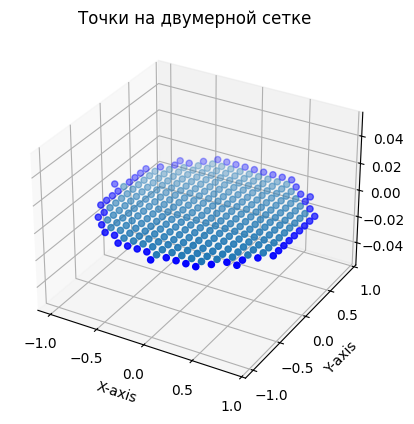

C:\Users\Настя\AppData\Local\Temp\ipykernel_1008\3776181605.py:15: RuntimeWarning: invalid value encountered in divide
  res /= num_of_match


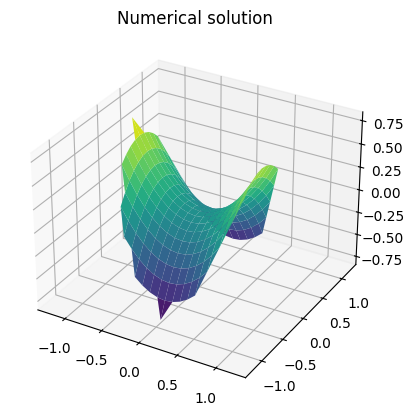

In [383]:
h = 0.1
num_walks = 10 ** 4
f = lambda x, y: x ** 2 - y ** 2
X, Y, res = monte_carlo_simulation(h, num_walks, f)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
res[res == np.nan] = 0
ax.plot_surface(X, Y, res, cmap='viridis')
plt.title("Numerical solution")
plt.show()

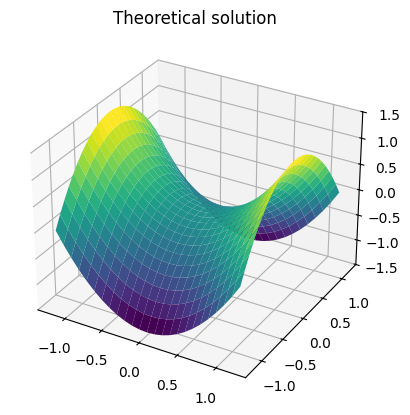

In [384]:
h = 0.1
x = np.arange(-1 - 2 * h, 1+ 3 * h, h)
y = np.arange(-1 - 2 * h, 1+ 3 * h, h)
X, Y = np.meshgrid(x, y)
Z = X ** 2 - Y ** 2
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
plt.title("Theoretical solution")
plt.show()

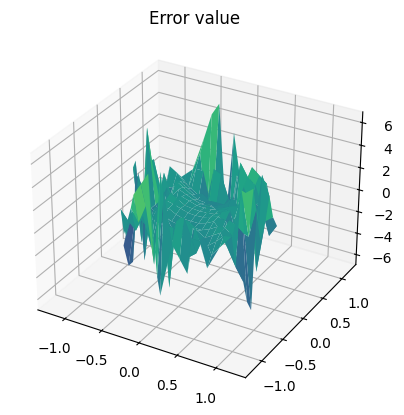

In [385]:
h = 0.1
err = Z - res
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, err, cmap='viridis')
plt.title("Error value")
plt.show()

# Задание 9

Рассмотреть два вида гауссовских процессов: $\\$
- Винеровский процесс $W(t), t \in [0, 1], W(0) = 0 \\$
- Процесс Орнштейна-Уленбека $X(t), t\in [0, 1], X(0) = X_0$, т.е. стационарный марковский гауссовский процесс. Начальные значения $X_0$ следует выбирать случайным образом так, чтобы полученный процесс был стационарным.

*9.1 Найти ковариационную функцию и переходные вероятности*

*9.2 Промоделировать независимые траектории процесса с данными переходными вероятностями методом добавления разбиения отрезка*

*9.3 Построить график траектории, не соединяя точки ломаной, с целью получения визуально непрерывной линии*

ВИНЕРОВСКИЙ ПРОЦЕСС $\\$
*Винеровским процессом* с параметром $\sigma > 0$ называется случайная функция ${W(t), t \geq 0}$, удовлетворяющая условиям: $\\$
- $W(0) = 0$ почти наверное $\\$
- $W(t)$ - процесс с независимыми приращениями $\\$
- Для любых $t, s \geq 0$ выполнено $W(t) - W(s) \sim N(0, \sigma^2|t - s|).$ 
Можно заметить, что 
$$W(t) = W(t) - W(0) \sim N(0, \sigma^2t).$$
Отсюда легко выводится:
$$\mathbb{E}W(t) = 0, \quad var(W(t)) = \sigma^2t$$
Рассмотрим ковариационную функцию. Пусть $t > s$, тогда $W(t) - W(s)$ и $W(s)$ являются независимыми, значит 
$$R(t, s) = \mathbb{E}(W(t) - W(s)) \mathbb{E}W(s) + \mathbb{E}W^2(s) = \mathbb{E}W^2(s) = \sigma^2s$$
Аналогично, при $t < s, \quad R(t, s) = \sigma^2t$. Значит
$$R(t, s) = \sigma^2 \min(t, s).$$
Для моделирования используем метод добавления разбиения отрезка:$\\$
1) Знаем, что $W(0) = 0$, тогда $W(1) = W(1) - W(0) \sim N(0, \sigma^2) \\$
2) Зная значения $W(t_1), W(t_2)$ вычисляем $W(t_\ast)$, для простоты выбираем $t_\ast = \frac{t_1 + t_2}{2} \\$
3) Повторяем шаг 2 пока не достигнем нужного числа точек, причем после $n$ итераций получим $2^n + 1$ точку. $\\$
Осталось найти способ вычисления $W(t_\ast)$. Знаем, что $W(t_\ast)$ нормально распределена, посчитаем параметры. Для этого рассмотрим условную плотность:
$$f_{W_{t_\ast}}(\omega_\ast | W_{t_1} = \omega _1, W_{t_2} = \omega _2) = \dfrac{f_{W_{t_1}W_{t_\ast}W_{t_2}}(\omega _1, \omega _\ast,\omega _2)}{f_{W_{t_1}W_{t_2}}(\omega _1,\omega _2)},$$
причём
$$f_{W_1,...,W_n} = \frac{1}{\sqrt{(2 \pi)^n det(R)}} exp \{-\frac{1}{2}(\omega - \mu) R^{-1}(\omega - \mu)^{T}\}.$$
Используя формулы, приведённые выше, можем записать значения R для формулы в числителе и значенателе:
$$f_{W_{t_1}W_{t_\ast}W_{t_2}} \quad \rightarrow \quad R_1 = \sigma^2 \cdot
\begin{bmatrix}
t_1 & t_1    & t_1 \\
t_1 & t_\ast & t_\ast \\
t_1 & t_\ast & t_2
\end{bmatrix}$$
$$f_{W_{t_1}W_{t_2}} \quad \rightarrow \quad R_2 = \sigma^2 \cdot
\begin{bmatrix}
t_1 & t_1\\
t_1 & t_2
\end{bmatrix}$$
Для упрощения далее используем символьные вычисления.

In [ ]:
!pip3 install sympy



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Настя\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB 388.9 kB/s eta 0:00:16
    --------------------------------------- 0.1/6.2 MB 819.2 kB/s eta 0:00:08
   - -------------------------------------- 0.2/6.2 MB 1.3 MB/s eta 0:00:05
   -- ------------------------------------- 0.4/6.2 MB 1.7 MB/s eta 0:00:04
   ---- ----------------------------------- 0.7/6.2 MB 2.7 MB/s eta 0:00:03
   ---- ----------------------------------- 0.8/6.2 MB 2.7 MB/s eta 0:00:03
   -------- ------------------------------- 1.3/6.2 MB 3.5 MB/s eta 0:00:02
   -------- ------------------------------- 1.3/6.2 MB 3.2 MB/s eta 0:00:02
   ----------- ---------------------------- 1.8/6.2 MB 3.9 MB/s eta 0:00:02
   -------------- ------------------------- 2.3/6.2 MB 4.3 MB/s eta 0:00:01
   ------------------ -------------

In [2]:
import sympy as sp

In [ ]:
w1 = sp.Symbol('w1', real=True)
w2 = sp.Symbol('w2', real=True)
w = sp.Symbol('w', real=True)
t1 = sp.Symbol('t1', real=True)
t2 = sp.Symbol('t2', real=True)
t = (t1 + t2) / 2
sigma = sp.Symbol('sigma', real=True)
R1 = sigma ** 2 * sp.Matrix([[t1, t1, t1],
                             [t1, t, t],
                             [t1, t, t2]

])
R2 = sigma ** 2 * sp.Matrix([[t1, t1],
                             [t1, t2]

])
w123 = sp.Matrix([w1, w, w2])
w12 = sp.Matrix([w1, w2])
#по формуле для f дисперсия равна отношению определителей R1/R2
var = (R1.det() / R2.det()).simplify()
# для нахождения среднего необязательно рассчитывать все формулу, достаточно рассмотреть степень экспоненты
exp1 = - 1 / 2 * (w123.T @ R1.inv() @ w123)[0]
exp2 = - 1 / 2 * (w12.T @ R2.inv() @ w12)[0]
exp_deg = (exp1 - exp2).simplify()
print(var)
print(exp_deg)

sigma**2*(-t1 + t2)/4
1.0*(2.0*w**2 - 2.0*w*w1 - 2.0*w*w2 + 0.5*w1**2 + 1.0*w1*w2 + 0.5*w2**2)/(sigma**2*(t1 - t2))


Итак, получили 
$$\sigma_\ast = \frac{\sigma^2(t_2 - t_1)}{4}.$$
Рассмотрим теперь получившуюся степень экспоненты и приведём к нужному виду:
$$\frac{4\omega^2_\ast - 4 \omega _\ast\omega _1 - 4\omega _\ast \omega_2 + \omega _1^2 + 2\omega _1 \omega _2 + \omega _2^2}{2\sigma^2 (t_1 - t_2)} = -\frac{1}{2} \frac{4\omega _\ast^2 - 4\omega _\ast(\omega _1 + \omega _2) + (\omega _1 + \omega _2)^2}{4 \sigma_\ast^2} = -\frac{1}{2} \frac{(\omega_\ast - \frac{\omega_1 + \omega_2}{2})^2}{\sigma_\ast}$$
Таким образом, подобрали параметры и в алгоритме используем $W(t_\ast) \sim N(\frac{\omega_1 + \omega_2}{2}, \frac{\sigma^2(t_2 - t_1)}{4}).$


In [16]:
def wiener_simulation(sigma, n):
    proc = np.zeros(2 ** n + 1)
    proc[2 ** n] = sigma * np.random.randn()
    for i in range(n):
        idx_step = 2 ** (n - i)
        dt = 2 ** (- i)
        for j in range(0, 2 ** n + 1 - idx_step, idx_step):
            w1 = proc[j]
            w2 = proc[j + idx_step]
            proc[j + idx_step // 2] = sigma * math.sqrt(dt) / 2 * np.random.randn() + (w1 + w2) / 2
    return proc

In [17]:
wiener_simulation(1, 3)

array([ 0.        , -0.25458215, -0.6904986 , -0.24113096, -0.38795882,
       -0.67877509, -0.3858259 , -0.38997207, -0.63548103])

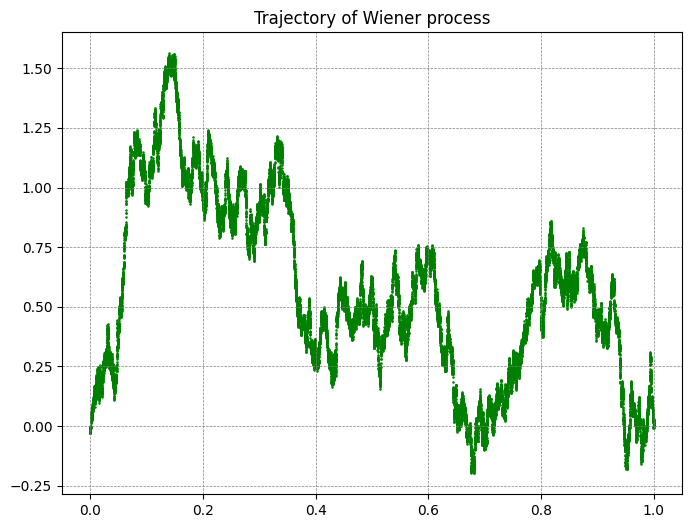

In [39]:
n = 15
sigma = 1.5
grid = np.linspace(0, 1, 2 ** n + 1)
plt.figure(figsize=(8,6))
wiener_proc = wiener_simulation(sigma, n)
plt.scatter(grid, wiener_proc, color='green', s=0.7)
plt.title("Trajectory of Wiener process")
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
#plt.gca().set_aspect('equal', adjustable='box')
plt.show()

ПРОЦЕСС ОРНШТЕЙНА-УЛЕНБЕКА
Этот процесс вводился как единственный нетривиальный гауссовский процесс, являющийся стационарным и обладающий марковским свойством. $\\$
Из стационарности следует, что
$$\mathbb{E}X_t = a = const, \quad var(X_t) = \sigma^2 = const, \quad K_X(s, t) = \rho (|s - t|).$$
Из марковости получаем
$$K_X(s, t) = K_X(s, \tau)K_X(\tau, t), \quad \forall 1 \leq s \leq\tau \leq t \leq n$$
Здесь $K$ - корреляционная функция.
Сделав замену $s = \tau - s, y = t - \tau$, получим
$$\rho(|s - t|) = \rho(|s - \tau|)\rho(|\tau - t|) \Leftrightarrow \rho(|- x - y|) = \rho(|-x|)\rho(|-y|) \Leftrightarrow \rho(x + y) = \rho(x)\rho(y).$$
Полученное уравнение называется уравнением Коши и имеет решения:
$$K_X(t) = 0, \quad K_X(t) = e^{-\lambda t}, \lambda > 0.$$
Случай $K_X(t, s) = 0$ не так интересен для рассмотрения, так как ввиду гауссовости получим, что слуйчайные величины $X_t$ независимы в совокупности. $\\$
В другом случае получим
$$R(s, t) = \sigma^2 e^{-\lambda|t - s|}, \quad lambda > 0.$$
Хотим решить задачу с помощью метода добавления разбиения отрезка. В отличие от винеровского процесса точное значение $X(0) = X_0$ неизвестно,его нужно выбирать случайным образом для стационарности процесса. 
Найдём плотность $f_{X_{t_1}}(x_1|X_{t_2} = x_2) = \dfrac{f_{X_{t_1}X_{t_2}}(x_1, x_2)}{f_{X_{t_2}}(x_2)}$. 
$$f_{X_{t_1}X_{t_2}}(x_1, x_2) = \frac{1}{\sqrt{4\pi^2 det(R_0)}}exp\{-\frac{1}{2}(x - a) R_0^{-1}(x - a)^{T}\}$$ 
$$f_{X_{t_2}}(x_2) = \frac{1}{\sqrt{2\pi \sigma^2}}exp\{-\frac{(x_2 - a)^2}{2\sigma^2}\}.$$
Воспользуемся символьными вычислениями.

In [5]:
x1 = sp.Symbol('x1', real=True)
x2 = sp.Symbol('x2', real=True)
sigma = sp.Symbol('sigma', real=True)
a = sp.Symbol('a', real=True)
t1 = sp.Symbol('t1', real=True)
t2 = sp.Symbol('t2', real=True)
lam = sp.Symbol('lam', real=True)
#d = sp.Mod(t2 - t1)
d = sp.Symbol('d', real=True) #|t1 - t2|
R0 = sigma ** 2 * sp.Matrix([[1, sp.exp(-lam * d)],
                             [sp.exp(-lam * d), 1]

])
x12 = sp.Matrix([x1, x2])
aa = sp.Matrix([a, a])
var = (R0.det() / sigma ** 2).simplify()
exp1 = - 1 / 2 * ((x12 - aa).T @ R0.inv() @ (x12 - aa))[0]
exp2 = - (x2 - a) ** 2 / (2 * sigma ** 2)
exp_deg = (exp1 - exp2).simplify()
print(var)
print(exp_deg)

sigma**2 - sigma**2*exp(-2*d*lam)
-(-(a - x2)**2*(exp(2*d*lam) - 1) + 1.0*((a - x1)*(-a + x2 + (a - x1)*exp(d*lam)) - (a - x2)*(a - x1 + (-a + x2)*exp(d*lam)))*exp(d*lam))/(2*sigma**2*(exp(2*d*lam) - 1))


В рассматриваемом случае $d = 1$. Тогда
$$\sigma_\ast = \sigma^2(1 - e^{-2\lambda})$$
Преобразовав выражение в степени ддя экспоненты получим:
$$\mu_\ast = x_2 e^{-\lambda} + a(1 - e^{-\lambda}).$$ 
Итак, 
$$f_{X_{t_1}}(x_1|X_{t_2} = x_2) \sim N(x_2 e^{-\lambda} + a(1 - e^{-\lambda}), \sigma^2(1 - e^{-2\lambda}))$$


Аналогично случаю с винеровским процессом ищем значения по формулам.
$$f_{X_{t_\ast}}(x_\ast | X_{t_1} = x_1, X_{t_2} = x_2) = \dfrac{f_{X_{t_1}X_{t_\ast}X_{t_2}}(x_1, x_\ast, x_3)}{f_{X_{t_1}X_{t_2}}(x_1, x_3)},$$
$$f_{X_1,...,X_n} = \frac{1}{\sqrt{(2 \pi)^n det(R)}} exp \{-\frac{1}{2}(x - \mu) R^{-1}(x - \mu)^{T}\}.$$
$$f_{X_{t_1}X_{t_\ast}X_{t_2}} \quad \rightarrow \quad R_1 = \sigma^2 \cdot
\begin{bmatrix}
1                           & e^{-\lambda(t_\ast - t_1)}    &  e^{-\lambda(t_2 - t_1)} \\
e^{-\lambda(t_\ast - t_1)}  & 1                             &  e^{-\lambda(t_2 - t_\ast)}\\
e^{-\lambda(t_2 - t_1)}     & e^{-\lambda(t_2 - t_\ast)}    & 1
\end{bmatrix}$$
$$f_{X_{t_1}X_{t_2}} \quad \rightarrow \quad R_2 = \sigma^2 \cdot
\begin{bmatrix}
1                       & e^{-\lambda(t_2 - t_1)}\\
e^{-\lambda(t_2 - t_1)} & 1
\end{bmatrix}$$
Введём обозначения 
$$d = t - t_1$$
Для упрорщения вычислений положим $a = 0$. Это возможно, если рассматривать слоучайню величину со сдвигом $X_t - a$, а потом переобозначить эту величину за $X_t$.

In [9]:
x1 = sp.Symbol('x1', real=True)
x2 = sp.Symbol('x2', real=True)
x = sp.Symbol('x', real=True)
t1 = sp.Symbol('t1', real=True)
t2 = sp.Symbol('t2', real=True)
t = (t1 + t2) / 2
d = sp.Symbol('d', real=True)
sigma = sp.Symbol('sigma', real=True)
a = sp.Symbol('a', real=True)
R1 = sigma ** 2 * sp.Matrix([[1, sp.exp(-lam*d), sp.exp(-lam*2*d)],
                             [sp.exp(-lam*d), 1, sp.exp(-lam*d)],
                             [sp.exp(-lam*2 *d), sp.exp(-lam*d), 1]

])
R2 = sigma ** 2 * sp.Matrix([[1, sp.exp(-lam*2*d)],
                             [sp.exp(-lam*2*d), 1]

])
x123 = sp.Matrix([x1, x, x2])
x12 = sp.Matrix([x1, x2])
aa = sp.Matrix([a, a])
aaa = sp.Matrix([a, a, a])
#по формуле для f дисперсия равна отношению определителей R1/R2
var = (R1.det() / R2.det()).simplify()
var

sigma**2*tanh(d*lam)

In [11]:
# для нахождения среднего необязательно рассчитывать все формулу, достаточно рассмотреть степень экспоненты
exp1 = - 1 / 2 * ((x123).T @ R1.inv() @ (x123))[0]
exp2 = - 1 / 2 * ((x12).T @ R2.inv() @ (x12))[0]
exp_deg = (exp1 - exp2).simplify()
exp_deg

-(0.5*x**2*exp(4*d*lam) + 1.0*x**2*exp(2*d*lam) + 0.5*x**2 - 1.0*x*x1*exp(3*d*lam) - 1.0*x*x1*exp(d*lam) - 1.0*x*x2*exp(3*d*lam) - 1.0*x*x2*exp(d*lam) + 0.5*x1**2*exp(2*d*lam) + 1.0*x1*x2*exp(2*d*lam) + 0.5*x2**2*exp(2*d*lam))/(sigma**2*(exp(4*d*lam) - 1))

Таким образом, упростив выражения, получим
$$\sigma_\ast = \frac{\sigma^2(e^{2d\lambda} - 1)}{e^{2d\lambda} + 1}$$
$$\mu = \frac{e^{\lambda d}(x_1 + x_2)}{e^{2 \lambda d} + 1}$$
Тогда $$X_{t_\ast} \sim N\big(\frac{e^{\lambda d}(x_1 + x_2)}{e^{2 \lambda d} + 1}, \frac{\sigma^2(e^{2d\lambda} - 1)}{e^{2d\lambda} + 1}\big)$$

In [3]:
def ornstein_uhlenbeck_simulation(sigma, n, lam):
    proc = np.zeros(2 ** n + 1)
    proc[0] = np.random.randn() * sigma
    proc[2 ** n] = proc[0] * math.exp(-lam) + np.random.randn() * sigma * math.sqrt(1 - math.exp(- 2 * lam))
    for i in range(n):
        idx_step = 2 ** (n - i)
        dt = 2 ** (- i)
        for j in range(0, 2 ** n + 1 - idx_step, idx_step):
            x1 = proc[j]
            x2 = proc[j + idx_step]
            d = dt
            exp_tmp = math.exp(2 * d * lam)
            proc[j + idx_step // 2] = sigma * math.sqrt((exp_tmp - 1) / (exp_tmp + 1)) * np.random.randn() + math.exp(lam * d) * (x1 + x2) / (exp_tmp + 1)
    return proc

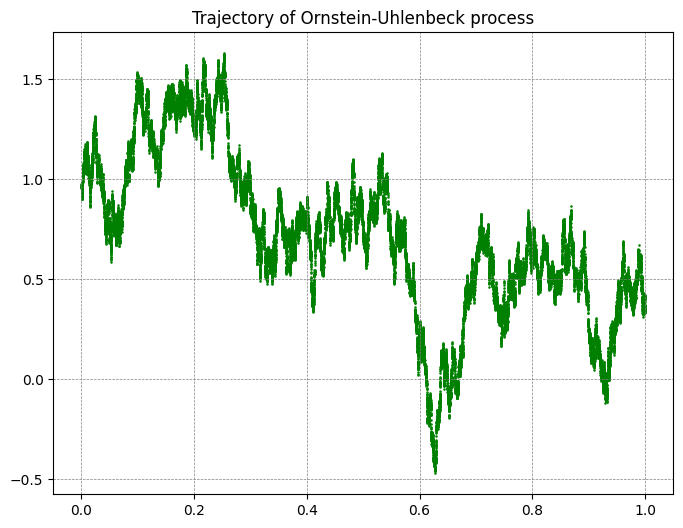

In [24]:
n = 15
sigma = 1
lam = 1
grid = np.linspace(0, 1, 2 ** n + 1)
plt.figure(figsize=(8,6))
ornstein_uhlenbeck_proc = ornstein_uhlenbeck_simulation(sigma, n, lam)
plt.scatter(grid, ornstein_uhlenbeck_proc, color='green', s=0.7)
plt.title("Trajectory of Ornstein-Uhlenbeck process")
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
#plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Задание 10

Произвести фильтрацию одномерного процесса Орнштейна-Уленбека:$\\$
1) Используя генератор белого шума, добавить к реализации процесса Орнштейна-Уленбека случайную ошибку с заранее известной дисперсией. $\\$
2) При помощи одномерного фильтра Калмана оценить траекторию процесса по зашумлённому сигналу, считая известными параметры шума и процесса. $\\$
3) Рассмотреть следующие виды шума:
- Гауссов
- Коши

Рассматриваем процесс Орнштейна-Уленбека на сетке, точгда его "координаты" изменяются по следующему закону:
$$x_{k+1} = ax_k + v_k$$
Считается, что на устройстве принимаем зашумлённый сигнал. Его динамика описывается следующим образом:
$$y_k = x_k + \xi_k$$
По условию заранее знаем дисперсию ошибки: $\xi_k \sim N(0, r^2). \\$
Считаем, что $v_k \sim N(0, q^2)$. Также из предыдущего задания знаем, что $x_0 \sim N(0, \sigma^2)$.
Для дальшейшего решения задачи необходимо найти значения параметров $a, q$. Зная, что $x_k$ и $v_k$ незывисимы, а также свойства процесса Орнштейна-Уленбека:
$$R(t_k, t_k) = \sigma^2,$$
$$R(t_k, t_{k+1}) = a\cdot var(x_{t_k}) = \sigma^2 e^{-\lambda(t_{k+1} - t_k)} \quad \Rightarrow \quad a = e^{-\lambda(t_{k+1} - t_k)},$$
$$R(t_{k+1}, t_{k+1}) = a^2 \sigma^2 + q^2 = \sigma^2 \quad \Rightarrow \quad q^2 = \sigma^2(1 - e^{-2\lambda(t_{k+1} - t_k)}).$$
Далее необходимо выбрать коэффициент Калмана $K_{k+1}$ таким, чтобы получившееся оптимальное значение $x_{k+1}^{opt}$ было бы наиболее близко к истинному значению $x_{k+1}$. Чтобы найти точное значение коэффициента Калмана $K_{k+1}$, нужно минимизировать ошибку:
$$x_{k+1}^{opt} = K_{k+1}y_{k+1} + (1 - K_{k+1})ax_k^{opt}$$
$$e_{k+1} = x_{k+1} - x_{k+1}^{opt}$$
Тогда 
$$e_{k+1} = x_{k+1} - K_{k+1}y_{k+1} - (1 - K_{k+1})ax_k^{opt} = ax_k + v_k - K(ax_k + v_k + \xi_{k+1}) - (1 - K_{k+1})ax_k^{opt} = (1 - K_{k+1})(ae_k + v_k) - K_{k+1}\xi_{k+1}.$$
Минимизировать ошибку означает $\mathbb{E}(e^2_{k+1}) \rightarrow min$:
$$\mathbb{E}(e^2_{k+1}) = (1 - K_{k+1})^2(a^2\mathbb{E}e_k^2 + q^2) + K_{k+1}^2r^2$$
Приравнивая производную выражения к 0, получим
$$K_{k+1} = \frac{a^2\mathbb{E}e_k^2 + q^2}{a^2\mathbb{E}e_k^2 + q^2 + r^2}$$
Подставляем это значение в минимизируемую функцию
$$\mathbb{E}(e^2_{k+1}) = \frac{r^2(a^2\mathbb{E}e_k^2 + q^2)}{a^2\mathbb{E}e_k^2 + q^2 + r^2}$$
Запишем алгоритм работы программы:
1) $\mathbb{E}(e_0^2) = r^2$, $x_0^{opt} = y_0$
2) На каждой итерации вычисляем $\mathbb{E}(e^2_{k+1})$ по формуле, представленной выше. Далее вычисляем $K_{k+1} = \dfrac{\mathbb{E}(e^2_{k+1})}{r^2}$. Зная коэффициент Калмана вычисляем $x_{k+1}^{opt}$ по формуле выше.
Параметры программы: $\sigma, r, \lambda,$ число точек.


ШУМ С РАСПРЕДЕЛЕНИЕМ ГАУССА

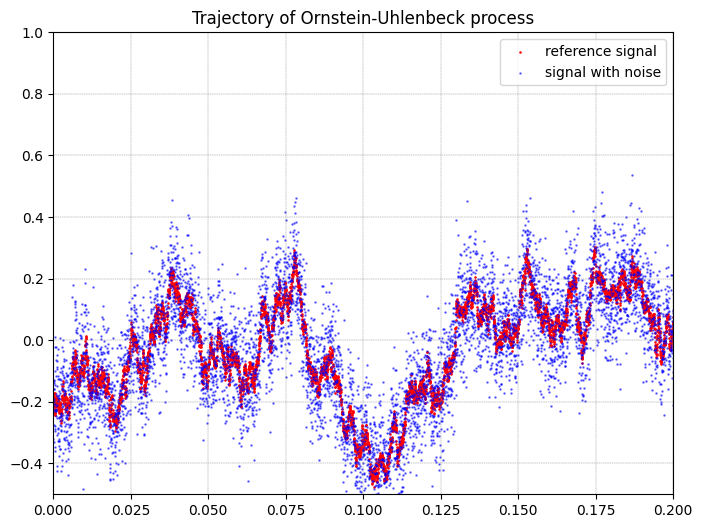

In [37]:
sigma = 1
lam = 1
n = 15
num_points = 2 ** n + 1
r = 0.1
x = ornstein_uhlenbeck_simulation(sigma, n, lam)
noise = np.random.randn(num_points) * r
y = x + noise
grid = np.linspace(0, 1, num_points)
plt.figure(figsize=(8,6))
plt.scatter(grid, x, color='red', s=0.7,alpha=1, label='reference signal')
plt.scatter(grid, y, color='blue', s=0.7, alpha=0.5, label="signal with noise")
plt.title("Trajectory of Ornstein-Uhlenbeck process")
plt.xlim([0., 0.2])
plt.ylim([-0.5, 1])
plt.legend()
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.3)
#plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [ ]:
def kalman_filter(sigma, lam, r, y):
    num_points = len(y)
    #x = np.zeros(num_points)
    x_opt = np.zeros(num_points)
    err = np.zeros(num_points)
    dt = 1 / (num_points - 1)
    a = math.exp(-lam * dt)
    q2 = sigma ** 2 * (1 - math.exp(-lam * 2 * dt))
    x_opt[0] = y[0]
    err[0] = r ** 2
    for i in range(1, num_points):
        err[i] = r ** 2 * (a ** 2 * err[i - 1] + q2) / (a ** 2 * err[i - 1] + q2 + r ** 2)
        k = err[i] / (r ** 2)
        x_opt[i] = k * y[i] + (1 - k) * a * x_opt[i - 1]
    return x_opt, err

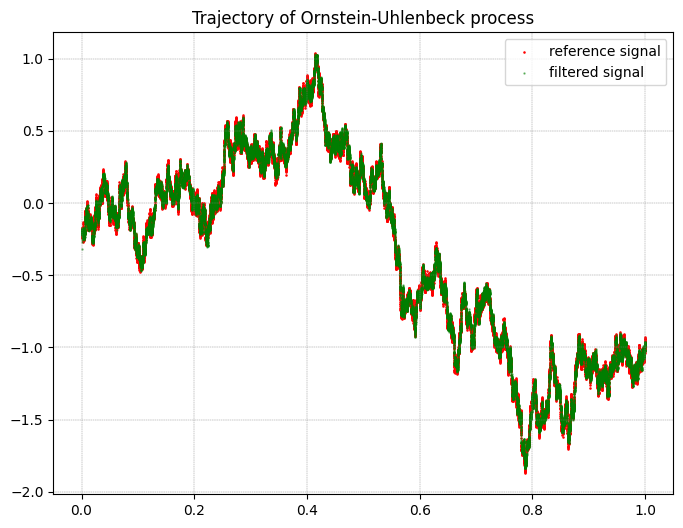

In [41]:
x_filtered, err = kalman_filter(sigma, lam, r, y)
plt.figure(figsize=(8,6))
plt.scatter(grid, x, color='red', s=0.7,alpha=1, label='reference signal')
plt.scatter(grid, x_filtered, color='green', s=0.5, alpha=0.5, label="filtered signal")
plt.title("Trajectory of Ornstein-Uhlenbeck process")
plt.legend()
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.3)
plt.show()

Ошибка фильтрации имеет нормальное распределение и доверительный интервал имеет вид:
$$[x^{opt} - \epsilon, x^{opt} + \epsilon], \quad \epsilon = -\sqrt{\mathbb{E}e}\cdot Ф(\frac{\alpha}{2}),$$
где $\alpha$ - уровень значимости

In [42]:
from scipy.stats import norm

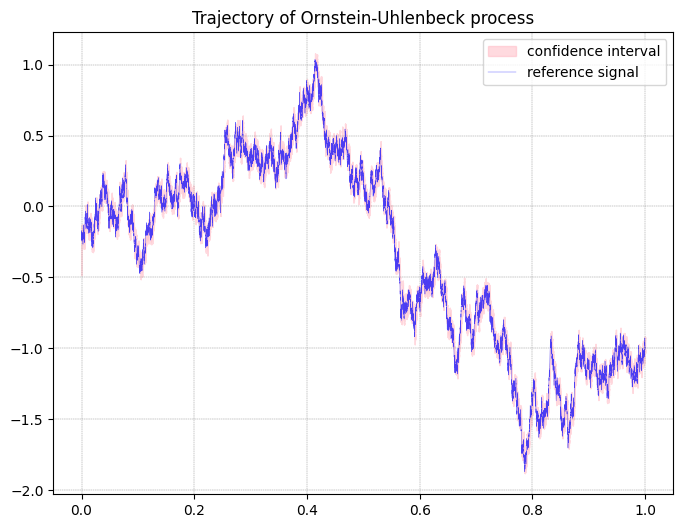

In [56]:
alpha = 0.1
#quant = norm.ppf(alpha / 2)
eps = - np.sqrt(err) * norm.ppf(alpha / 2)
low = x_filtered - eps
upper = x_filtered + eps
plt.figure(figsize=(8,6))
plt.fill_between(grid, low, upper, color="lightpink", alpha=0.5, label="confidence interval")
plt.plot(grid, x, color='blue', lw=0.3, alpha=0.7, label="reference signal")
plt.title("Trajectory of Ornstein-Uhlenbeck process")
plt.legend()
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.3)
plt.show()

ШУМ С РАСПРЕДЕЛЕНИЕМ КОШИ $\\$
Теоретические выкладки такие же.

In [130]:
def Cauchy_rnd(x0, gamma, *shape):
    if gamma <= 0:
        raise ValueError(f"$\gamma$ = {gamma} is less then 0!")
    unif_sample = np.random.uniform(0.0, 1.0, *shape)
    return x0 + gamma * np.tan(math.pi * (unif_sample - 0.5))

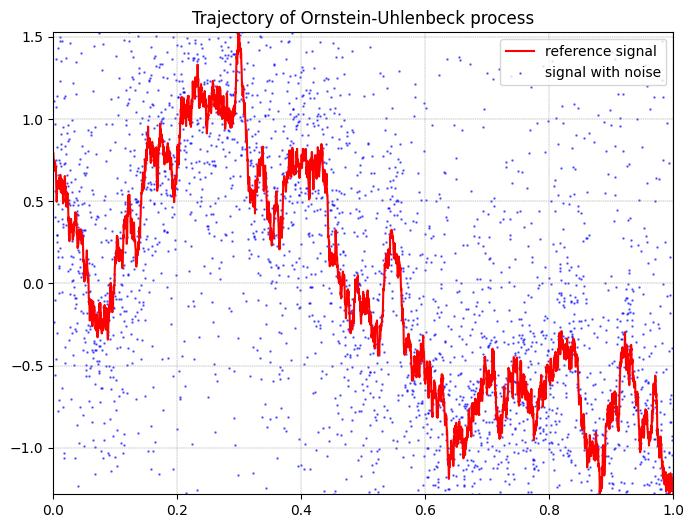

In [163]:
sigma = 1
lam = 1
n = 12
num_points = 2 ** n + 1
r = 0.5
x = ornstein_uhlenbeck_simulation(sigma, n, lam)
#noise = np.random.standard_cauchy(num_points) * r
noise = Cauchy_rnd(0, r, num_points)
y = x + noise
grid = np.linspace(0, 1, num_points)
upper_limit = np.percentile(y, 99)
lower_limit = np.percentile(y, 1)
mask1 = (y <= upper_limit)
mask2 = (y >= lower_limit)
y_masked = y[mask1 & mask2]
grid_new = grid[mask1 & mask2]
plt.figure(figsize=(8,6))
plt.plot(grid, x, color='red', alpha=1, label='reference signal')
plt.scatter(grid_new, y_masked, color='blue', s=0.7, alpha=0.5, label="signal with noise")
plt.title("Trajectory of Ornstein-Uhlenbeck process")
plt.xlim([0, 1])
plt.ylim([np.min(x), np.max(x)])
plt.legend()
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.3)
#plt.gca().set_aspect('equal', adjustable='box')
plt.show()

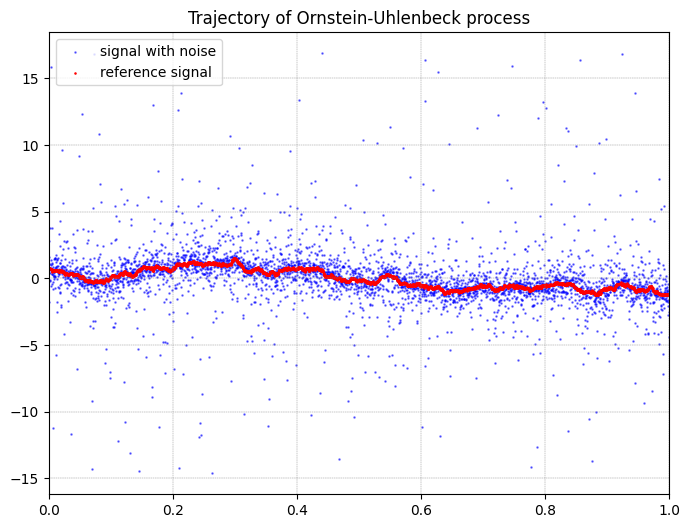

In [164]:
plt.figure(figsize=(8,6))
plt.scatter(grid_new, y_masked, color='blue', s=0.7, alpha=0.5, label="signal with noise")
plt.scatter(grid, x, color='red', s=0.7,alpha=1, label='reference signal')
plt.title("Trajectory of Ornstein-Uhlenbeck process")
plt.xlim([0, 1])
#plt.ylim([-1, 1])
plt.legend()
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.3)
#plt.gca().set_aspect('equal', adjustable='box')
plt.show()

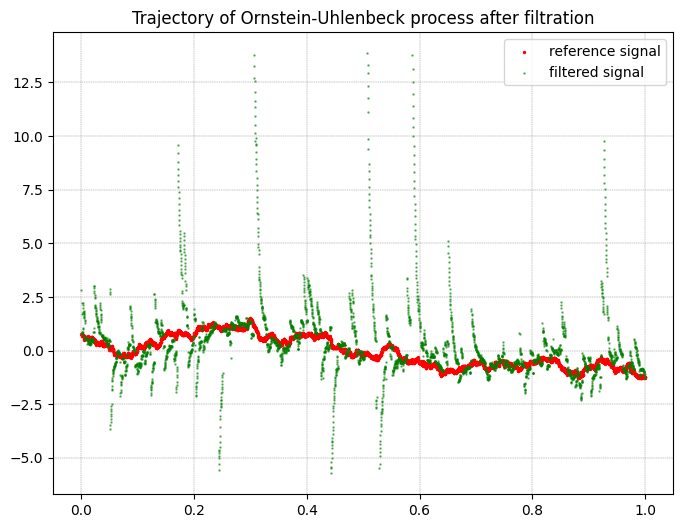

In [165]:
x_filtered, err = kalman_filter(sigma, lam, r, y)
upper_limit = np.percentile(x_filtered, 99)
lower_limit = np.percentile(x_filtered, 1)
mask1 = (x_filtered <= upper_limit)
mask2 = (x_filtered >= lower_limit)
x_masked = x_filtered[mask1 & mask2]
grid_new = grid[mask1 & mask2]
plt.figure(figsize=(8,6))
plt.scatter(grid, x, color='red', s=2,alpha=1, label='reference signal')
plt.scatter(grid_new, x_masked, color='green', s=0.7, alpha=0.5, label="filtered signal")
plt.title("Trajectory of Ornstein-Uhlenbeck process after filtration")
plt.legend()
#plt.ylim([np.min(x), np.max(x)])
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.3)
plt.show()

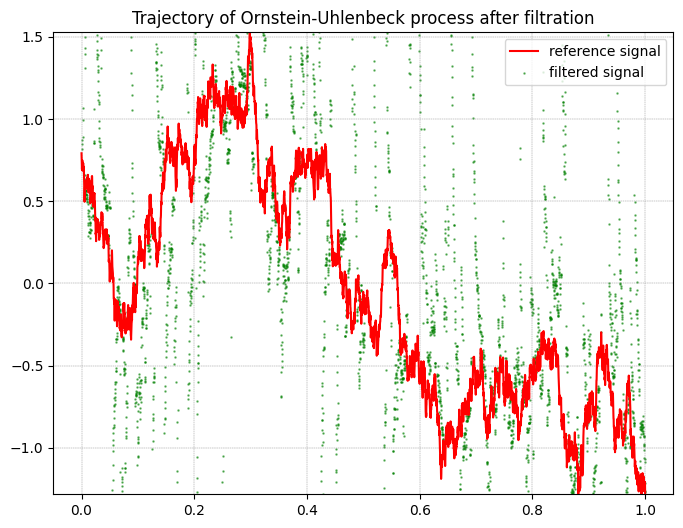

In [167]:
plt.figure(figsize=(8,6))
plt.plot(grid, x, color='red',alpha=1, label='reference signal')
plt.scatter(grid_new, x_masked, color='green', s=0.7, alpha=0.5, label="filtered signal")
plt.title("Trajectory of Ornstein-Uhlenbeck process after filtration")
plt.legend()
plt.ylim([np.min(x), np.max(x)])
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.3)
plt.show()

Стало лучше, но не сильно

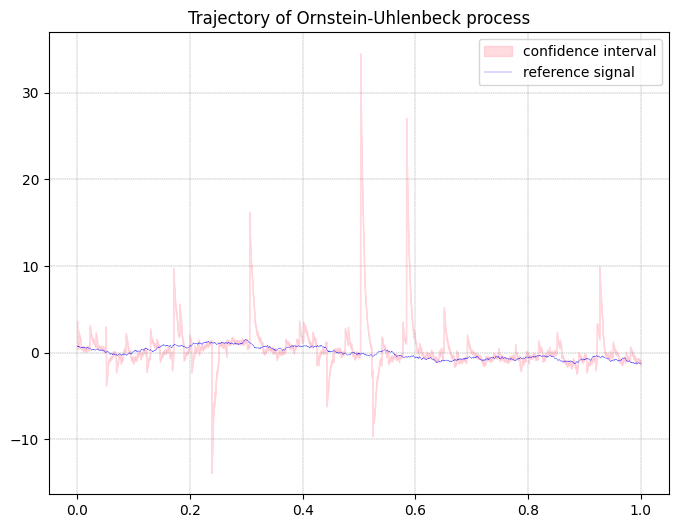

In [173]:
alpha = 0.1
#quant = norm.ppf(alpha / 2)
eps = - np.sqrt(err) * norm.ppf(alpha / 2)
low = x_filtered - eps
upper = x_filtered + eps
plt.figure(figsize=(8,6))
plt.fill_between(grid, low, upper, color="lightpink", alpha=0.5, label="confidence interval")
plt.plot(grid, x, color='blue', lw=0.3, alpha=0.7, label="reference signal")
#plt.scatter(grid_new, y_masked, s=0.5, color='green', label="signal with noise")
plt.title("Trajectory of Ornstein-Uhlenbeck process")
plt.legend()
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.3)
plt.show()

# Задание 11

Построить двумерное пуассоновское поле, отвечающее сложному пуассоновскому процессу.

*11.1 Система массового обслуживания. Первая координата поля - время поступления заявки в СМО (распределённое равномерно), а вторая - время обслуживания заявки (распределение $\chi^2$ с 10 степенями свободы)*

Рассматриваем первую координату поля на отрезке $[0, T]$. В теории пуассоновского поля $k$ - мера Лебега, $\lambda$ - интенсивность поля (в нашем случае интенсивность поступления заявок = среднее число новых заявок в единицу времени). Тогда случайная считающая мера, равная числу заявок определяется следующим образом:
$$n \sim Pois(\lambda T).$$
По условию время поступления заявки распределено расвномерно. Введём обозначение:
$$t_i \sim U[0, T].$$
После моделирования моментов поступления заявок необходимо упорядочить их по возрастанию. Пусть $\tau_i$ - время обслуживания заявки, по условию имеет распределение $\chi^2$ с 10 степенями свободы. Вспомним важное свойство этого распределения:
$$\mathbb{E}\tau_i = 10.$$
Проведём логическое рассуждение. В момент времени $t_1$ в обработку поступает первая заявка, следовательно, в момент времени $t_1 + \tau_1$ первая заявка будет обработана. Причём в момент обработки первой заявки могут поступать другие заявки, которые образуют очередь и обрабатываются постепенно. Тогда для последующих заявок выполняется правило: если $(i - 1)$я заявка была обработана до момента поступления $i$й заявки $t_i$, то она будет обработана в момент времени $t_i + \tau_i$, иначе она будет обработана через $\tau_i$ единиц после завершения обработки $(i - 1)$ заявки. Обозначим момент окончания обработки $(i - 1)$ заявки как $t_i^{end}$ Тогда можем посчитаеть количество заявок, находящихся в очереди в момент t:
$$Q(t) = \sum_{i=1}^{n} \mathbb{1}_{t_i \leq t < t_{i - 1}^{end}}$$
Ввиду свойств рассматриваемого пуассоновского поля:
$$t_{i+1} - t_{i} \sim Exp(\lambda).$$
Тогда решение задачи можем разбить на 3 случая. Из распределения времени обслуживания заявки знаем, что среднее время обслуживания одной заявки равно числу степеней свободы, то есть 10. Из свойства указанного выше среднее время между поступлением заявок равно $\frac{1}{\lambda}$. Тогда $\\$
1) Если $\frac{1}{\lambda} > 10$, то есть заявки поступают медленнее, чем обрабатываются  СМО справляется с задачей. $\\$
2) Если $\frac{1}{\lambda} < 10$, то СМО не справляется с обработкой. $\\$
3) Если $\frac{1}{\lambda} = 10$, СМО находится в равновесии.

In [182]:
def QS_simulation(lam, T, grid_size):
    n = np.random.poisson(lam * T)
    t = np.random.uniform(0.0, T, n)
    t = np.sort(t)
    Q = np.zeros(grid_size)
    grid = np.linspace(0, T, grid_size)
    tau = np.random.chisquare(10, n)
    t_end = np.zeros(n)
    t_end[0] = t[0] + tau[0] #момент окончания обработки первой заявки
    for i in range(1, n):
        if t_end[i - 1] <= t[i]:
            t_end[i] = t[i] + tau[i]
        else:
            t_end[i] = t_end[i - 1] + tau[i]
    for i in range(grid_size):
        for j in range(1, n):
            if (grid[i] >= t[j]) and (grid[i] <= t_end[j - 1]):
                Q[i] += 1
    return grid, Q

Пример $\frac{1}{\lambda} < 10$ 

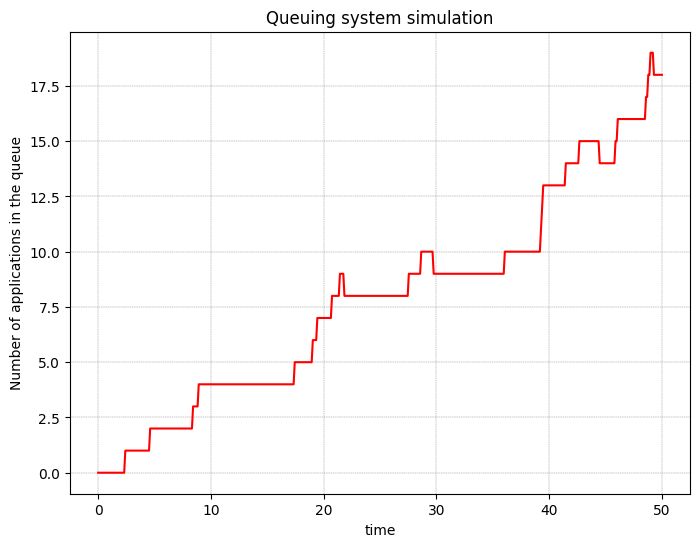

In [228]:
T = 50
lam = 0.5
grid_size = 500
grid, Q = QS_simulation(lam, T, grid_size)
plt.figure(figsize=(8,6))
plt.plot(grid, Q, color='red',alpha=1)
plt.title("Queuing system simulation")
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.3)
plt.xlabel("time")
plt.ylabel("Number of applications in the queue")
plt.show()

Пример $\frac{1}{\lambda} > 10$

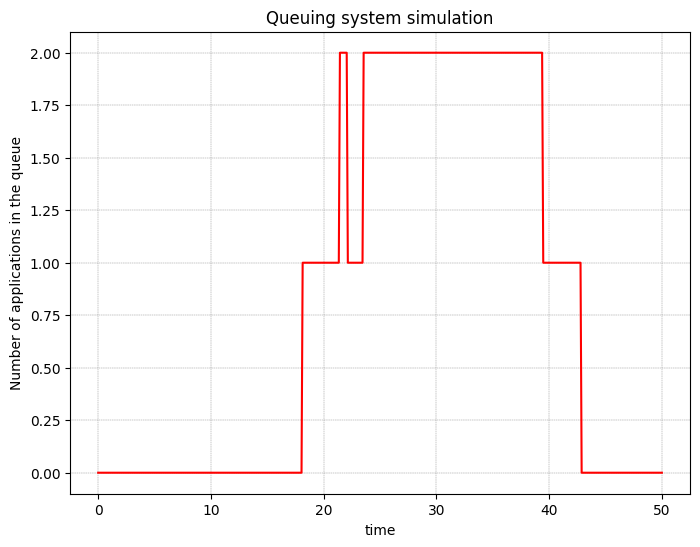

In [226]:
T = 50
lam = 0.07
grid_size = 500
grid, Q = QS_simulation(lam, T, grid_size)
plt.figure(figsize=(8,6))
plt.plot(grid, Q, color='red',alpha=1)
plt.title("Queuing system simulation")
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.3)
plt.xlabel("time")
plt.ylabel("Number of applications in the queue")
plt.show()

Пример $\frac{1}{\lambda} = 10$

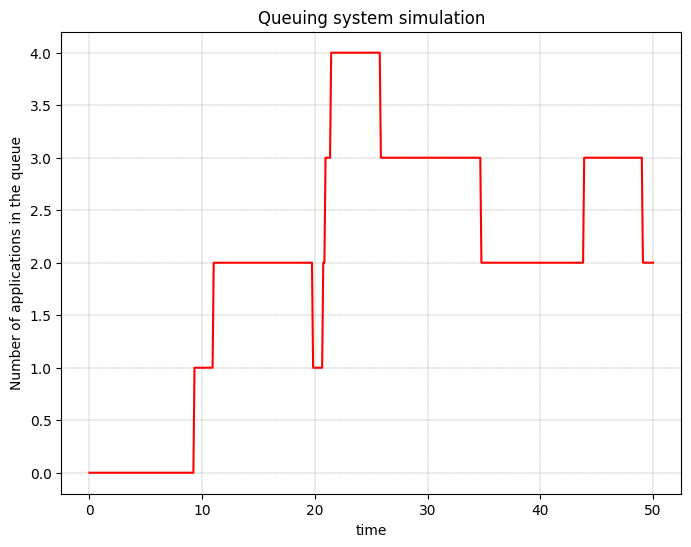

In [209]:
T = 50
lam = 0.1
grid_size = 500
grid, Q = QS_simulation(lam, T, grid_size)
plt.figure(figsize=(8,6))
plt.plot(grid, Q, color='red',alpha=1)
plt.title("Queuing system simulation")
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.3)
plt.xlabel("time")
plt.ylabel("Number of applications in the queue")
plt.show()

*11.2 Система массового обслуживания с циклической интенсивностью $\lambda(1 + \cos (t))$ и единичными скачками. При помощи метода Льюиса и Шедлеара, свести задачу моделирования пуассоновского процесса к моделированию двумерного пуассоновского поля, где первая координата распределена равномерно, а вторая имеет распределение Бернулли*

Метод Льюиса и Шедлеара позволяетпреобразовать неоднородный пауссоновский процесс в однородный. Для этого: $\\$
1) Определим верхнюю границу для интенсивности. В нашем случае максимальная интенсивность равна $2\lambda. \\$
2) Генерируем пуассоновский процесс как в предыдущем пункте с постоянной интенсивностью $2, \lambda. \\$
3) Для каждого события, сгенерированного в однородном процессе, определяем, произошло ли оно на основе исходной функции интенсивности $\lambda(t)$. То есть удаляем $t_i$ с вероятностью $1 - \frac{\lambda(t_i)}{2\lambda}. \\$
Таким образом, как раз получим поле, где первая координата распределена равномерно, а вторая имеет распределение Бернулли.

In [197]:
def nonunif_QS_simulation(lam, T, grid_size):
    n = np.random.poisson(2 * lam * T)
    t = np.random.uniform(0.0, T, n)
    t = np.sort(t)
    lam_cycle = lambda t: (1 + np.cos(t)) / 2
    idx = np.random.uniform(0.0, 1.0, n) < lam_cycle(t)
    t_new = t[idx]
    n_new = len(t_new)
    Q = np.zeros(grid_size)
    grid = np.linspace(0, T, grid_size)
    tau = np.random.chisquare(10, n_new)
    t_end = np.zeros(n_new)
    t_end[0] = t[0] + tau[0] #момент окончания обработки первой заявки
    for i in range(1, n_new):
        if t_end[i - 1] <= t[i]:
            t_end[i] = t[i] + tau[i]
        else:
            t_end[i] = t_end[i - 1] + tau[i]
    for i in range(grid_size):
        for j in range(1, n_new):
            if (grid[i] >= t[j]) and (grid[i] <= t_end[j - 1]):
                Q[i] += 1
    return grid, Q

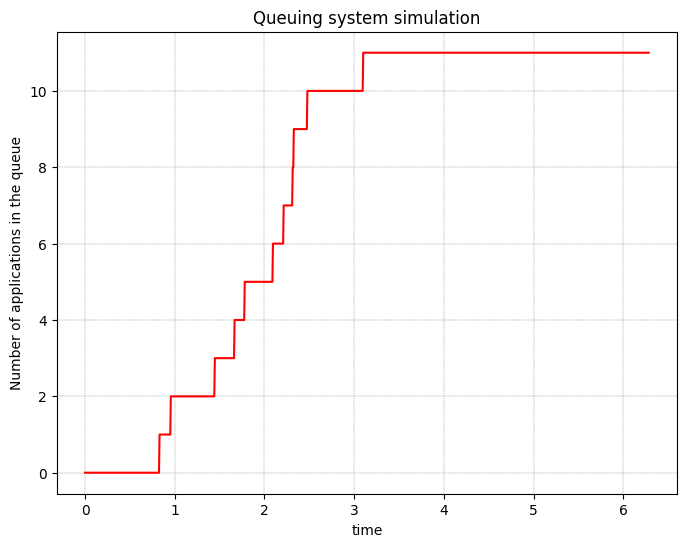

In [207]:
T = 2 * math.pi 
lam = 2
grid_size = 1000
grid, Q = nonunif_QS_simulation(lam, T, grid_size)
plt.figure(figsize=(8,6))
plt.plot(grid, Q, color='red',alpha=1)
plt.title("Queuing system simulation")
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.3)
plt.xlabel("time")
plt.ylabel("Number of applications in the queue")
plt.show()

*11.3 Работа страховой компании: первая координата - момент наступления страхового случая (равномерное распределение), вторая - величина ущерба (распределение Парето). Поступление капитала считать линейным по времени со скоростью $c > 0$, начальный капитал $W > 0$*

Величина ущерба $\tau_i$ имеет распределение Парето с параметрами $(a, b)$. Знаем, что 
$$\mathbb{E}\tau_i = 
\begin{dcases}
\frac{ab}{a - 1}, \quad a > 1, \\
+\infty, \quad a \leq 1.
\end{dcases}$$
Будем моделировать случайную величину из этого распределения методом обратных функций:
$$X = \frac{b}{(1 - Y)^{1 / a}}, \quad Y \sim U[0, 1].$$
Значит 
$$X = \frac{b}{Y^{1 / a}}, \quad Y \sim U[0, 1].$$
Капитал страховой компании изменяется по правилу:
$$W(t) = W + ct - \sum_{i=1}^{Q(t)}\tau_i,$$
где $Q(t)$ - число страховых случаев. $\\$
После того, как в какой то момент времени $W(t) = 0$, оставшийся вектор заполняется нулями.
Алгоритм моделирования такой же как в случаях выше.

In [251]:
def insurance_simulating(lam, T, grid_size, a, b, c, omega):
    n = np.random.poisson(lam * T)
    t = np.random.uniform(0.0, T, n)
    t = np.sort(t)
    tau = b / (np.random.uniform(0.0, 1.0, n)) ** (1 / a)
    grid = np.linspace(0, T, grid_size)
    Q = np.zeros(grid_size)
    for i in range(grid_size):
        for j in range(n):
            if grid[i] >= t[j]:
                Q[i] += tau[j]
    W = omega + c * grid - Q
    zero_idx = np.nonzero(W < 0)[0]
    if zero_idx.size > 0:
        W[zero_idx[0]:] = 0
    return grid, W

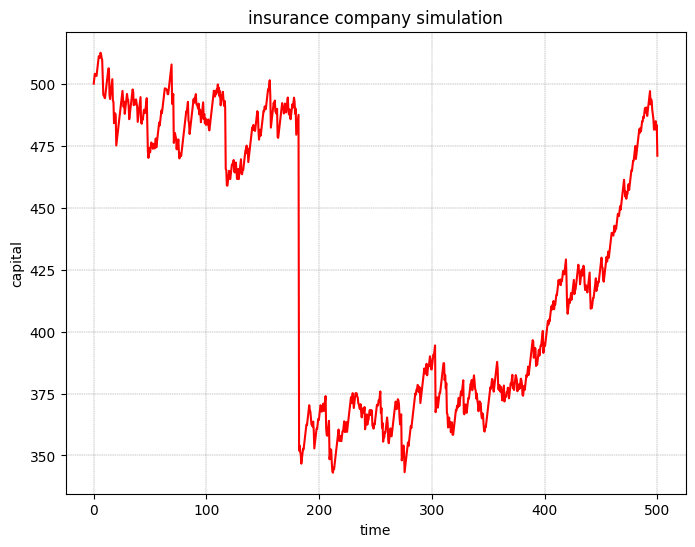

In [247]:
T = 500
lam = 1
omega = 500
a = 2
b = 2
c = 4
grid_size = 1000
grid, W = insurance_simulating(lam, T, grid_size, a, b, c, omega)
plt.figure(figsize=(8,6))
plt.plot(grid, W, color='red',alpha=1)
plt.title("insurance company simulation")
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.3)
plt.xlabel("time")
plt.ylabel("capital")
plt.show()

Пример банкротства

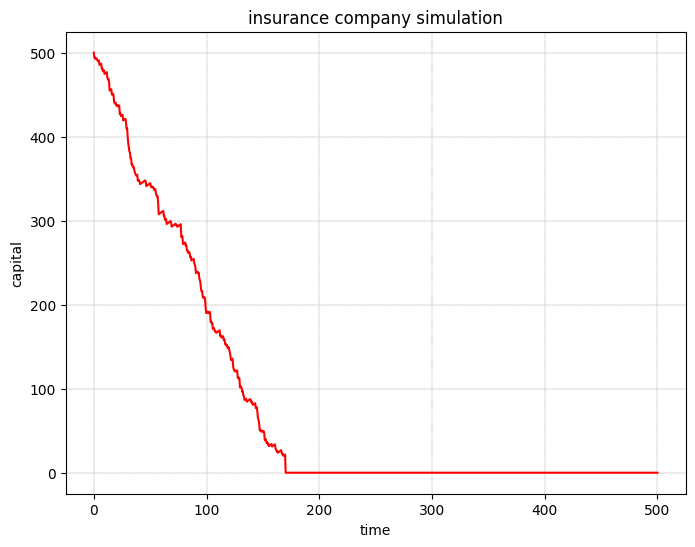

In [253]:
T = 500
lam = 1
omega = 500
a = 2
b = 2
c = 1
grid_size = 1000
grid, W = insurance_simulating(lam, T, grid_size, a, b, c, omega)
plt.figure(figsize=(8,6))
plt.plot(grid, W, color='red',alpha=1)
plt.title("insurance company simulation")
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.3)
plt.xlabel("time")
plt.ylabel("capital")
plt.show()